In [1]:
import torch.nn as nn
import torch
from torch.autograd import Variable
import numpy as np

## Conv2d function

import torch.nn as nn

nn.Conv2d(input_channel, output_channel, kernel_size)

* __in_channels (int)__ – Number of channels in the input image
* __out_channels (int)__ – Number of channels produced by the convolution
* __kernel_size (int or tuple)__ – Size of the convolving kernel
* __stride (int or tuple, optional)__ – Stride of the convolution. Default: 1
* __padding (int or tuple, optional)__ – Zero-padding added to both sides of the input. Default: 0
* __dilation (int or tuple, optional)__ – Spacing between kernel elements. Default: 1
* __groups (int, optional)__ – Number of blocked connections from input channels to output channels. Default: 1
* __bias (bool, optional)__ – If True, adds a learnable bias to the output. Default: True 

### Let's have a first look for in_channel = 1, and out_channel = 1


In [5]:
input1 = Variable(torch.ones(1,1,5,5))
print(input1)
x = torch.nn.Conv2d(in_channels = 1, out_channels = 1
                    , kernel_size = 3)
out = x(input1)
print(out)
print(list(x.parameters()))

tensor([[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]])
tensor([[[[0.1634, 0.1634, 0.1634],
          [0.1634, 0.1634, 0.1634],
          [0.1634, 0.1634, 0.1634]]]], grad_fn=<ThnnConv2DBackward>)
[Parameter containing:
tensor([[[[-0.0648, -0.0688,  0.1452],
          [ 0.2405,  0.1058,  0.2182],
          [-0.0821, -0.2248,  0.0973]]]], requires_grad=True), Parameter containing:
tensor([-0.2033], requires_grad=True)]



#### In this case, kernel size is 3, input_channel and output_channel is 1, then 
#### kernel = 1,1,3,3

### Denote in_channel is X , out_channel is N , kernel size is K.

#### kernel = N,X,K,K

As can be seen from above, $out$ only has one channel, it means only 1 feature map got.

$x.parameters$ has two parameter, one is W matrix, the other one is bias.

$W$ matrix is kernel matrix

### If increase N from 1 to 3, then it means they have 3 kernel to convolv one channel, 
### The result would contains 3 feature map：


In [24]:
input2 = Variable(torch.ones(1,1,5,5))
x2 = torch.nn.Conv2d(in_channels = 1, out_channels = 3
                    , kernel_size = 3)
out2 = x2(input2)
print(out2)
print(list(x2.parameters()))

tensor([[[[-1.3081, -1.3081, -1.3081],
          [-1.3081, -1.3081, -1.3081],
          [-1.3081, -1.3081, -1.3081]],

         [[-0.4901, -0.4901, -0.4901],
          [-0.4901, -0.4901, -0.4901],
          [-0.4901, -0.4901, -0.4901]],

         [[-0.6600, -0.6600, -0.6600],
          [-0.6600, -0.6600, -0.6600],
          [-0.6600, -0.6600, -0.6600]]]], grad_fn=<ThnnConv2DBackward>)
[Parameter containing:
tensor([[[[-0.1960, -0.2744,  0.1056],
          [ 0.1661, -0.2969,  0.0704],
          [-0.2911, -0.3005, -0.0076]]],


        [[[-0.1745,  0.0332, -0.0111],
          [ 0.0262, -0.0718, -0.2778],
          [ 0.1884,  0.0967, -0.2439]]],


        [[[ 0.1476, -0.2850, -0.1964],
          [ 0.0988,  0.1024, -0.3127],
          [-0.2778, -0.0459, -0.0447]]]], requires_grad=True), Parameter containing:
tensor([-0.2838, -0.0554,  0.1537], requires_grad=True)]


### The output feature map is 3, means out_channel is 3, use 3 filters to convolv $input2$, 
### kernel size is 3,1,3,3, means use 3 filters to make up a kernel.

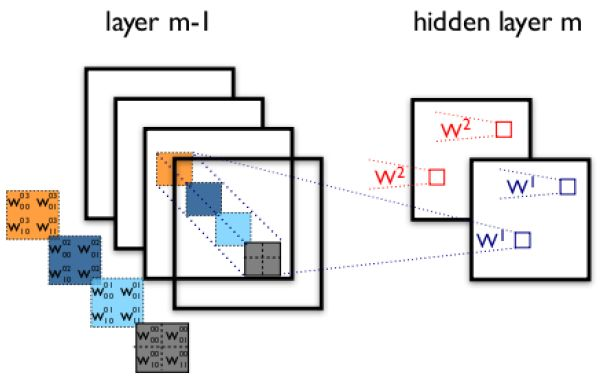

### When in_channel increase to X (4 as figure above), and out_channel N (2 as figure above) has different meaning.
### 有N乘X个filter(N组filters,每组X 个)对输入进行滤波。即每次有一组里X个filter对原X个channels分别进行滤波最后相加输出一个结果，最后输出N个结果即feature map

In [26]:
input3 = Variable(torch.ones(1,4,5,5))
x3 = torch.nn.Conv2d(in_channels = 4, out_channels = 2
                    , kernel_size = 3)
out3 = x3(input3)
print(out3)
print(list(x3.parameters()))

tensor([[[[ 0.1647,  0.1647,  0.1647],
          [ 0.1647,  0.1647,  0.1647],
          [ 0.1647,  0.1647,  0.1647]],

         [[-0.2612, -0.2612, -0.2612],
          [-0.2612, -0.2612, -0.2612],
          [-0.2612, -0.2612, -0.2612]]]], grad_fn=<ThnnConv2DBackward>)
[Parameter containing:
tensor([[[[-0.0056,  0.1116, -0.0199],
          [-0.0626,  0.0022,  0.0067],
          [ 0.0465, -0.1565,  0.1117]],

         [[-0.0495, -0.0000,  0.0372],
          [-0.1400,  0.0695,  0.1610],
          [ 0.0071, -0.0411,  0.0141]],

         [[ 0.0972,  0.1116, -0.1562],
          [ 0.0135, -0.0969,  0.1519],
          [-0.0402,  0.0575, -0.0831]],

         [[ 0.1534, -0.1188,  0.1324],
          [-0.1528, -0.1626,  0.1011],
          [ 0.0219,  0.0942, -0.0118]]],


        [[[ 0.0320, -0.0441,  0.0282],
          [-0.0957, -0.0154, -0.0553],
          [-0.0947, -0.0557,  0.0264]],

         [[ 0.1179, -0.0773, -0.0929],
          [ 0.0002,  0.1055,  0.0670],
          [-0.0357, -0.1040, -0.1

### kernel size is 2,4,3,3, means use 8 filters(3,3) to make up a kernel.